In [2]:
import pandas as pd
import re
import matplotlib as mlt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.axes as axes
import  math

#!{sys.executable} -m pip install seaborn
import seaborn as sb

In [3]:
dataset = pd.read_csv("datasets/Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv")
dataset

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,04/16/2019,11:00,"Puerto Montt, Chile",Archipelagos Service Aereos,NaN,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,CC-CYR,2169,6.0,5.0,1.0,6.0,5.0,1.0,0.0,"While the aircraft was in the initial climb, p..."
4963,05/05/2019,18:30,"Near Monclava, Mexico",TVPX Aircraft Solutions,NaN,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,N601VH,5043,13.0,11.0,2.0,13.0,11.0,2.0,0.0,The aircraft crashed while en route on a retur...
4964,05/05/2019,18:30,"Moscow, Russia",Aeroflot Russian International Airlines,NaN,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,78.0,73.0,5.0,41.0,40.0,1.0,0.0,Forty-five minutes after taking off from Mosco...
4965,06/03/2019,13:00,"Near Lipo, India",Military - Indian Air Force,NaN,Jorhat-Rowriah - Mechuka,Antonov An-32,K2752,1009,13.0,5.0,8.0,13.0,5.0,8.0,0.0,Crashed about 34km WNW of Mechuka.


---
---
# Gabro

#### Cleaning colonna **Operator**

In [4]:
print("numero di Na:", len([i for i in dataset.Operator if type(i) == float])) # abbiamo solo 10 Na
print(dataset.shape)

# Eliminazione righe contenenti Na nella colonna Operator
dataset = dataset[dataset['Operator'].notna()]
print(dataset.shape)

numero di Na: 10
(4967, 17)
(4957, 17)


Identificazione e raggruppamento categoria di operatore militare

In [5]:
dataset['Operator'].unique()

military_flights = []

military_words = ["army", "navy", "marine", "military", "force", "airforce", "amee de l'air"]

# Identifica tutti i nomi degli operatori che appartengono al campo militare
for operator in dataset['Operator'].unique():
    for word in military_words:
        if word.lower() in operator.lower() and operator not in military_flights: military_flights.append(operator)

# Identifica tutti i nomi degli operatori che in Route hanno Test flight e Test presumendo che si trattino anche essi di voli militari
test_flights = ["Test", "Test flight"]
for position, operator in enumerate(dataset['Operator']):
    if dataset.Route.iloc[position] in test_flights and operator not in military_flights: military_flights.append(operator)


print("numero di operatori militari univoci:", len(military_flights))  # 251 valori univoci relativi

numero di operatori militari univoci: 276


Identificazione e raggruppamento categoria di operatore postale

In [6]:
postal_cargo_flights = []

postal_e_cargo_words = ["postal", "mail", "aeropostale", "cargo", "express"]

# Identifica tutti i nomi degli operatori che appartengono al campo militare
for operator in dataset['Operator'].unique():
    if type(operator) != float:
        for word in postal_e_cargo_words:
            if word.lower() in operator.lower() and operator not in postal_cargo_flights: postal_cargo_flights.append(operator)

print("numero di operatori postali/cargo univoci:", len(postal_cargo_flights))

numero di operatori postali/cargo univoci: 82


#### Aggiunta valori per la nuova colonna

In [7]:
new_column = []

for value in dataset.Operator:
    if value in military_flights:
        new_column.append("Military flight")
    elif value in postal_cargo_flights:
        new_column.append("Postal/Cargo flights")
    else: new_column.append(value)

## ambulance --> decidere se assegnare una macro categoria

In [8]:
dataset = dataset.assign(New_Operator_column=new_column)
dataset

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,New_Operator_column
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",Military flight
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,Military flight
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,Private
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...,Military flight
5,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,NaN,NaN,30.0,NaN,NaN,0.0,Hydrogen gas which was being vented was sucked...,Military flight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,04/16/2019,11:00,"Puerto Montt, Chile",Archipelagos Service Aereos,NaN,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,CC-CYR,2169,6.0,5.0,1.0,6.0,5.0,1.0,0.0,"While the aircraft was in the initial climb, p...",Archipelagos Service Aereos
4963,05/05/2019,18:30,"Near Monclava, Mexico",TVPX Aircraft Solutions,NaN,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,N601VH,5043,13.0,11.0,2.0,13.0,11.0,2.0,0.0,The aircraft crashed while en route on a retur...,TVPX Aircraft Solutions
4964,05/05/2019,18:30,"Moscow, Russia",Aeroflot Russian International Airlines,NaN,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,78.0,73.0,5.0,41.0,40.0,1.0,0.0,Forty-five minutes after taking off from Mosco...,Aeroflot Russian International Airlines
4965,06/03/2019,13:00,"Near Lipo, India",Military - Indian Air Force,NaN,Jorhat-Rowriah - Mechuka,Antonov An-32,K2752,1009,13.0,5.0,8.0,13.0,5.0,8.0,0.0,Crashed about 34km WNW of Mechuka.,Military flight


#### Cleaning colonna **Route**

In [9]:
print("numero di NaN nella colonna Time:", len([i for i in dataset.Route if type(i) == float]))  # 774.. Non troppi, quindi da eliminare

numero di NaN nella colonna Time: 770


In [10]:
rotte = []

for route in dataset.Route:
    if type(route) != float: rotte.append(route.split("-"))
    else: rotte.append(route)

rotte_pulite = []
for route in rotte:
    new_route = []
    if type(route) != float:
        for aeroport in route:
            if "," in aeroport: new_route.append(re.sub(f",.+", "", aeroport))
            else: new_route.append(aeroport)
    else: new_route.append(route)
    rotte_pulite.append(new_route)

print(rotte_pulite)

[['Demonstration'], ['Test flight'], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], ['Shuttle'], ['Venice  Taliedo'], [nan], [nan], [nan], [nan], ['Paris ', ' Hounslow'], [nan], ['Washington ', ' Newark'], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], ['London ', ' Paris'], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], [nan], ['Warsaw ', ' Prague ', ' Strasbourg ', ' Paris'], ['Geraldton ', ' Derby'], [nan], [nan], ['Miami ', ' Bimini'], ['Croydon ', ' Le Bourget'], ['Croydon ', ' Paris'], ['Strasbourg ', ' Paris'], [nan], [nan], ['Venice ', ' London'], [nan], ['Toulouse ', ' Barcelona ', ' Valencia ', ' Alicante ', ' Malaga ', ' Rabat'], [nan], [nan], [nan], [nan], ['Paris ', ' London'], ['Paris ', ' Berck', 'sur', 'Mer ', ' Croydon'], [nan], [nan], ['Croydon ', ' Manchester'], [nan], [nan], ['Toulon ', '

#### Aggiunta colonna Aeroporto_di_partenza

In [11]:
# Aggiunta colonna Aeroporto_di_partenza
aeroporto_partenza = [aeroporto[0] for aeroporto in rotte_pulite]
dataset = dataset.assign(Aeroporto_di_partenza=aeroporto_partenza)

dataset

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,New_Operator_column,Aeroporto_di_partenza
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",Military flight,Demonstration
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,Military flight,Test flight
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,Private,NaN
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...,Military flight,NaN
5,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,NaN,NaN,30.0,NaN,NaN,0.0,Hydrogen gas which was being vented was sucked...,Military flight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,04/16/2019,11:00,"Puerto Montt, Chile",Archipelagos Service Aereos,NaN,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,CC-CYR,2169,6.0,5.0,1.0,6.0,5.0,1.0,0.0,"While the aircraft was in the initial climb, p...",Archipelagos Service Aereos,Puerto Montt
4963,05/05/2019,18:30,"Near Monclava, Mexico",TVPX Aircraft Solutions,NaN,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,N601VH,5043,13.0,11.0,2.0,13.0,11.0,2.0,0.0,The aircraft crashed while en route on a retur...,TVPX Aircraft Solutions,Las Vegas
4964,05/05/2019,18:30,"Moscow, Russia",Aeroflot Russian International Airlines,NaN,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,78.0,73.0,5.0,41.0,40.0,1.0,0.0,Forty-five minutes after taking off from Mosco...,Aeroflot Russian International Airlines,Moscow
4965,06/03/2019,13:00,"Near Lipo, India",Military - Indian Air Force,NaN,Jorhat-Rowriah - Mechuka,Antonov An-32,K2752,1009,13.0,5.0,8.0,13.0,5.0,8.0,0.0,Crashed about 34km WNW of Mechuka.,Military flight,Jorhat


#### Aggiunta colonne per aeroporti intermedi
Il numero massimo di aeroporti nelle rotte è 7 quindi andranno create 7 nuove colonne

In [12]:
# for aeroporto in rotte_pulite:
#     if len(aeroporto) == 7: print(aeroporto)

aeroporto_di_destinazione = []
aeroporto_2 = []
aeroporto_3 = []
aeroporto_4 = []
aeroporto_5 = []
aeroporto_6 = []


# Molto brutto... Decidere se cambiare
for n_aeroporti in rotte_pulite:
    if len(n_aeroporti) == 1:
        aeroporto_di_destinazione.append(n_aeroporti)
        aeroporto_2.append("Nan")
        aeroporto_3.append("Nan")
        aeroporto_4.append("Nan")
        aeroporto_5.append("Nan")
        aeroporto_6.append("Nan")
    if len(n_aeroporti) == 2:
        aeroporto_di_destinazione.append(n_aeroporti[-1])
        aeroporto_2.append("Nan")
        aeroporto_3.append("Nan")
        aeroporto_4.append("Nan")
        aeroporto_5.append("Nan")
        aeroporto_6.append("Nan")
    if len(n_aeroporti) == 3:
        aeroporto_2.append(n_aeroporti[1])
        aeroporto_di_destinazione.append(n_aeroporti[-1])
        aeroporto_3.append("Nan")
        aeroporto_4.append("Nan")
        aeroporto_5.append("Nan")
        aeroporto_6.append("Nan")
    if len(n_aeroporti) == 4:
        aeroporto_2.append(n_aeroporti[1])
        aeroporto_3.append(n_aeroporti[2])
        aeroporto_di_destinazione.append(n_aeroporti[-1])
        aeroporto_4.append("Nan")
        aeroporto_5.append("Nan")
        aeroporto_6.append("Nan")
    if len(n_aeroporti) == 5:
        aeroporto_2.append(n_aeroporti[1])
        aeroporto_3.append(n_aeroporti[2])
        aeroporto_4.append(n_aeroporti[3])
        aeroporto_di_destinazione.append(n_aeroporti[-1])
        aeroporto_5.append("Nan")
        aeroporto_6.append("Nan")
    if len(n_aeroporti) == 6:
        aeroporto_2.append(n_aeroporti[1])
        aeroporto_3.append(n_aeroporti[2])
        aeroporto_4.append(n_aeroporti[3])
        aeroporto_5.append(n_aeroporti[4])
        aeroporto_di_destinazione.append(n_aeroporti[-1])
        aeroporto_6.append("Nan")
    if len(n_aeroporti) == 7:
        aeroporto_2.append(n_aeroporti[1])
        aeroporto_3.append(n_aeroporti[2])
        aeroporto_4.append(n_aeroporti[3])
        aeroporto_5.append(n_aeroporti[4])
        aeroporto_6.append(n_aeroporti[5])
        aeroporto_di_destinazione.append(n_aeroporti[-1])

# Alcuni valori di aeroporto_di destinazione erano in una lista. Risolviamo:
for position, aeroporto in enumerate(aeroporto_di_destinazione):
    if type(aeroporto) == list:
        aeroporto_di_destinazione[position] = aeroporto[0]

dataset = dataset.assign(Aeroporto_2=aeroporto_2,
                         Aeroporto_3=aeroporto_3,
                         Aeroporto_4=aeroporto_4,
                         Aeroporto_5=aeroporto_5,
                         Aeroporto_6=aeroporto_6,
                         Aeroporto_di_destinazione=aeroporto_di_destinazione)

dataset

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,...,Ground,Summary,New_Operator_column,Aeroporto_di_partenza,Aeroporto_2,Aeroporto_3,Aeroporto_4,Aeroporto_5,Aeroporto_6,Aeroporto_di_destinazione
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,...,0.0,"During a demonstration flight, a U.S. Army fly...",Military flight,Demonstration,Nan,Nan,Nan,Nan,Nan,Demonstration
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,...,0.0,First U.S. dirigible Akron exploded just offsh...,Military flight,Test flight,Nan,Nan,Nan,Nan,Nan,Test flight
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,...,0.0,The first fatal airplane accident in Canada oc...,Private,NaN,Nan,Nan,Nan,Nan,Nan,NaN
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,...,0.0,The airship flew into a thunderstorm and encou...,Military flight,NaN,Nan,Nan,Nan,Nan,Nan,NaN
5,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,...,0.0,Hydrogen gas which was being vented was sucked...,Military flight,NaN,Nan,Nan,Nan,Nan,Nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,04/16/2019,11:00,"Puerto Montt, Chile",Archipelagos Service Aereos,NaN,Puerto Montt - Ayacara,Pilatus-Britten Norman BN-2B-27 Islander,CC-CYR,2169,6.0,...,0.0,"While the aircraft was in the initial climb, p...",Archipelagos Service Aereos,Puerto Montt,Nan,Nan,Nan,Nan,Nan,Ayacara
4963,05/05/2019,18:30,"Near Monclava, Mexico",TVPX Aircraft Solutions,NaN,Las Vegas - Monterrey,Canadair CL-600-2B16-Challenger,N601VH,5043,13.0,...,0.0,The aircraft crashed while en route on a retur...,TVPX Aircraft Solutions,Las Vegas,Nan,Nan,Nan,Nan,Nan,Monterrey
4964,05/05/2019,18:30,"Moscow, Russia",Aeroflot Russian International Airlines,NaN,Moscow - Murmansk,Sukhoi Superjet-100-95B,RA-89098,95135,78.0,...,0.0,Forty-five minutes after taking off from Mosco...,Aeroflot Russian International Airlines,Moscow,Nan,Nan,Nan,Nan,Nan,Murmansk
4965,06/03/2019,13:00,"Near Lipo, India",Military - Indian Air Force,NaN,Jorhat-Rowriah - Mechuka,Antonov An-32,K2752,1009,13.0,...,0.0,Crashed about 34km WNW of Mechuka.,Military flight,Jorhat,Rowriah,Nan,Nan,Nan,Nan,Mechuka


### Cleaning AC type

Ricordarsi di agiungere un .upper anche dopo il primo else una volta che abbiamo deciso di eliminare gli Na

In [13]:
# Prima pulizia

print(len(dataset["AC Type"].unique()))

simplified_aircraft_names = []

# Eliminazione dei pattern tipo "15-L ..." e "V-17 ..."
for airplane in dataset["AC Type"]:
    if type(airplane) != float and len(airplane.split()) > 1:
        simplified_aircraft_names.append(re.sub(r"[A-Z0-9]+-.+", "", airplane).upper())
    else: simplified_aircraft_names.append(airplane)

# Eliminazione dei pattern tipo "15.L ..." e "V.17 ..."
simplified_aircraft_names_1 = []
for position, airplane in enumerate(simplified_aircraft_names):
    if type(airplane) != float and len(airplane.split()) > 1:
        simplified_aircraft_names_1.append(re.sub(r"[A-Z0-9]+\.(.)+", "", airplane))
    else: simplified_aircraft_names_1.append(airplane)

print(simplified_aircraft_names_1)

2442
['WRIGHT FLYER III', 'Dirigible', 'CURTISS SEAPLANE', 'ZEPPELIN ', 'ZEPPELIN ', 'ZEPPELIN ', 'ZEPPELIN ', 'SCHUTTE-LANZ ', 'ZEPPELIN ', 'ZEPPELIN ', 'SUPER ZEPPELIN (AIRSHIP)', 'ZEPPELIN ', 'Airship', 'SCHUTTE-LANZ ', 'ZEPPELIN ', 'ZEPPELIN ', 'ZEPPELIN ', 'ZEPPELIN ', 'ZEPPELIN ', 'ZEPPELIN ', 'ZEPPELIN ', 'DE HAVILLAND ', 'DE HAVILLAND ', 'DE HAVILLAND ', 'FD TYPE DIRIGIBLE', 'CAPRONI ', 'DE HAVILLAND ', 'CURTISS ', 'DE HAVILLAND ', 'DE HAVILLAND ', 'DE HAVILLAND ', 'DE HAVILLAND ', 'DE HAVILLAND ', 'CURTISS ', 'CURTISS ', 'DE HAVILLAND ', 'DE HAVILLAND ', 'FARMAN ', 'ARMSTRONG-WHITWORTH ', 'DE HAVILLAND ', 'JUNKERS ', 'JUNKERS ', 'DE HAVILLAND ', 'SALMSON ', 'BREGUET 14', 'DE HAVILLAND ', 'DE HAVILLAND ', 'HANDLEY PAGE ', 'BREGUET 14', 'DE HAVILLAND ', 'JUNKERS ', 'BREGUET 14', 'DE HAVILLAND ', '  \t AVRO 504', 'DE HAVILLAND ', 'DE HAVILLAND ', 'DE HAVILLAND ', 'BREGUET 14', 'ROYAL AIRSHIP WORKS ', 'POTEZ IX', 'BRISTOL 28 TOURER', 'HANDLEY PAGE O/10', 'DIRIGIBLE ROMA (AIRSHIP)'

*Decidere se pulire maggiormente o meno*

In [14]:
dataset = dataset.assign(AC_Type_simplified=simplified_aircraft_names_1)
print(f"Prima della pulizia: {len(dataset['AC Type'].unique())} valori univoci")
print(f"Dopo la pulizia: {len(dataset['AC_Type_simplified'].unique())} valori univoci")

Prima della pulizia: 2442 valori univoci
Dopo la pulizia: 1018 valori univoci


### Controllo valori nulli delle colonne:
- Aboard
- Aboard Crew
- Aboard Passangers
- Fatalities
- Fatalities Crew
- Fatalities Passangers
- Ground

In [15]:
def na_counter_for_numeric_column(column, nome_colonna):
    nas = []
    for value in column:
        try:
            int(value)
        except:
            nas.append(value)
    return print(f"Numero di Na della colonna {nome_colonna}: {len(nas)}")

na_counter_for_numeric_column(dataset["Aboard"], "Aboard")
na_counter_for_numeric_column(dataset["Aboard Crew"], "Aboard Crew")
na_counter_for_numeric_column(dataset["Aboard Passangers"], "Aboard Passangers")
na_counter_for_numeric_column(dataset["Fatalities"], "Fatalities")
na_counter_for_numeric_column(dataset["Fatalities Crew"], "Fatalities Crew")
na_counter_for_numeric_column(dataset["Fatalities Passangers"], "Fatalities Passangers")
na_counter_for_numeric_column(dataset["Ground"], "Ground")

Numero di Na della colonna Aboard: 18
Numero di Na della colonna Aboard Crew: 223
Numero di Na della colonna Aboard Passangers: 226
Numero di Na della colonna Fatalities: 8
Numero di Na della colonna Fatalities Crew: 238
Numero di Na della colonna Fatalities Passangers: 239
Numero di Na della colonna Ground: 40


##### **Gli Na delle colonne Aboard e Fatalities secondo me si possono eliminare, magari quelli delle altre invece li sostituiamo con le medie**

---
---
# Maic

#### Check degli NA nella colonna Location

In [16]:
print("numero di NaN nella colonna Location:", len([i for i in dataset.Location if type(i) == float])) # Non abbiamo NA

numero di NaN nella colonna Location: 4


### Location Variable -> estraiamo dal testo solo gli stati

#### regex per prendere solo quello dopo l'ultima virgola

In [17]:
new_location = []
for w in dataset.Location:
    new_location.append(re.findall("[^ ,]\w*$", str(w)))

print(new_location)

[['Virginia'], ['Jersey'], ['Canada'], ['Sea'], ['Germany'], ['Belgium'], ['Germany'], ['Bulgeria'], ['England'], ['England'], ['Germany'], ['England'], ['Belgium'], ['Germany'], ['Sea'], ['Sea'], ['Denmark'], ['France'], ['Mediterranean'], ['Germany'], ['Sea'], ['Jersey'], ['Ohio'], ['Pennsylvania'], ['Illinois'], ['Italy'], ['England'], ['Maryland'], ['Kent'], ['Jersey'], ['UK'], ['Indiana'], ['Jersey'], ['Jersey'], ['Jersey'], ['Iowa'], ['Ohio'], ['Columbia'], ['England'], ['Maryland'], ['Jersey'], ['Ohio'], ['Pennsylvania'], ['France'], ['Spain'], ['Illinois'], ['Wyoming'], ['England'], ['Spain'], ['Minnisota'], ['Wisconsin'], ['Gibraltar'], ['Nevada'], ['Australia'], ['NY'], ['Ohio'], ['Wyoming'], ['France'], ['England'], ['France'], ['Australia'], ['France'], ['Virginia'], ['Ocean'], ['France'], ['England'], ['France'], ['Spain'], ['Indiana'], ['Italy'], ['Morocco'], ['Morocco'], ['France'], ['Spain'], ['Wyoming'], ['Pennsylvania'], ['France'], ['Kingdom'], ['Romania'], ['Ohio'],

#### Dal momento in cui le stringhe sono dentro una lista, tramite un ciclo annidato andiamo ad estrarre le stringhe e successivamente mettiamo tutto dentro una lista di supporto

In [18]:
tmp_state = []
for i in new_location:
    for w in i:
        tmp_state.append(w)

print(tmp_state)

['Virginia', 'Jersey', 'Canada', 'Sea', 'Germany', 'Belgium', 'Germany', 'Bulgeria', 'England', 'England', 'Germany', 'England', 'Belgium', 'Germany', 'Sea', 'Sea', 'Denmark', 'France', 'Mediterranean', 'Germany', 'Sea', 'Jersey', 'Ohio', 'Pennsylvania', 'Illinois', 'Italy', 'England', 'Maryland', 'Kent', 'Jersey', 'UK', 'Indiana', 'Jersey', 'Jersey', 'Jersey', 'Iowa', 'Ohio', 'Columbia', 'England', 'Maryland', 'Jersey', 'Ohio', 'Pennsylvania', 'France', 'Spain', 'Illinois', 'Wyoming', 'England', 'Spain', 'Minnisota', 'Wisconsin', 'Gibraltar', 'Nevada', 'Australia', 'NY', 'Ohio', 'Wyoming', 'France', 'England', 'France', 'Australia', 'France', 'Virginia', 'Ocean', 'France', 'England', 'France', 'Spain', 'Indiana', 'Italy', 'Morocco', 'Morocco', 'France', 'Spain', 'Wyoming', 'Pennsylvania', 'France', 'Kingdom', 'Romania', 'Ohio', 'England', 'Russia', 'Ohio', 'Sea', 'WY', 'Pennsylvania', 'Channel', 'Colombia', 'States', 'France', 'Indiana', 'England', 'USSR', 'Spain', 'France', 'Spain', 

#### Pulisco i valori

In [19]:
tmp_state_cleaned = []
for i in tmp_state:
    tmp_state_cleaned. append(re.sub(rf"[^\w\s]", "", i))

print(tmp_state_cleaned)

['Virginia', 'Jersey', 'Canada', 'Sea', 'Germany', 'Belgium', 'Germany', 'Bulgeria', 'England', 'England', 'Germany', 'England', 'Belgium', 'Germany', 'Sea', 'Sea', 'Denmark', 'France', 'Mediterranean', 'Germany', 'Sea', 'Jersey', 'Ohio', 'Pennsylvania', 'Illinois', 'Italy', 'England', 'Maryland', 'Kent', 'Jersey', 'UK', 'Indiana', 'Jersey', 'Jersey', 'Jersey', 'Iowa', 'Ohio', 'Columbia', 'England', 'Maryland', 'Jersey', 'Ohio', 'Pennsylvania', 'France', 'Spain', 'Illinois', 'Wyoming', 'England', 'Spain', 'Minnisota', 'Wisconsin', 'Gibraltar', 'Nevada', 'Australia', 'NY', 'Ohio', 'Wyoming', 'France', 'England', 'France', 'Australia', 'France', 'Virginia', 'Ocean', 'France', 'England', 'France', 'Spain', 'Indiana', 'Italy', 'Morocco', 'Morocco', 'France', 'Spain', 'Wyoming', 'Pennsylvania', 'France', 'Kingdom', 'Romania', 'Ohio', 'England', 'Russia', 'Ohio', 'Sea', 'WY', 'Pennsylvania', 'Channel', 'Colombia', 'States', 'France', 'Indiana', 'England', 'USSR', 'Spain', 'France', 'Spain', 

#### Infine andiamo a creare una nuovo variabile a ad inserirla all'interno del dataset

In [20]:
dataset = dataset.assign(state_location = tmp_state_cleaned)
print(dataset.state_location)

0       Virginia
2         Jersey
3         Canada
4            Sea
5        Germany
          ...   
4962       Chile
4963      Mexico
4964      Russia
4965       India
4966       India
Name: state_location, Length: 4957, dtype: object


In [21]:
list_of_states = dataset.state_location.unique()
print(list_of_states)

['Virginia' 'Jersey' 'Canada' 'Sea' 'Germany' 'Belgium' 'Bulgeria'
 'England' 'Denmark' 'France' 'Mediterranean' 'Ohio' 'Pennsylvania'
 'Illinois' 'Italy' 'Maryland' 'Kent' 'UK' 'Indiana' 'Iowa' 'Columbia'
 'Spain' 'Wyoming' 'Minnisota' 'Wisconsin' 'Gibraltar' 'Nevada'
 'Australia' 'NY' 'Ocean' 'Morocco' 'Kingdom' 'Romania' 'Russia' 'WY'
 'Channel' 'Colombia' 'States' 'USSR' 'Hungary' 'Mauritania'
 'Czechoslovakia' 'Oregon' 'Idaho' 'Algeria' 'Connecticut' 'Finland'
 'York' 'Uruguay' 'Ariège' 'Nebraska' 'Brazil' 'Minnesota' 'Kansas'
 'Netherlands' 'Texas' 'Washington' 'Tennessee' 'Greece' 'California'
 'Mexico' 'Algiers' 'Cuba' 'Iran' 'Ontario' 'Sardinia' 'Madagascar'
 'Missouri' 'Argentina' 'Massachusetts' 'China' 'Zealand' 'Burma'
 'Bulgaria' 'Africa' 'Utah' 'Thailand' 'Ilinois' 'Florida' 'Michigan'
 'Iraq' 'Chile' 'Lebanon' 'Bolivia' 'Arkansas' 'Colorado' 'Georgia'
 'Yugoslavia' 'Peru' 'Montana' 'Syria' 'nan' 'Pakistan' 'Egypt'
 'Mississippi' 'Switzerland' 'Alaska' 'Panama' 'Poland' 

#### Noto che c'è un nan value e campi vuoti non visti in precedenza

In [22]:
count_nan = 0
count_vuoti = 0
for i in dataset.state_location:
    if i == 'nan':
        count_nan += 1
    elif i == '':
        count_vuoti += 1

print('counter nan: ', count_nan)
print('counter spazi vuoti: ', count_vuoti)

counter nan:  4
counter spazi vuoti:  14


#### Li elimino

In [23]:
dataset = dataset[dataset.state_location != 'nan']
dataset = dataset[dataset.state_location != '']
print(dataset)

            Date   Time                            Location  \
0     09/17/1908  17:18                 Fort Myer, Virginia   
2     07/12/1912  06:30           Atlantic City, New Jersey   
3     08/06/1913    NaN  Victoria, British Columbia, Canada   
4     09/09/1913  18:30                  Over the North Sea   
5     10/17/1913  10:30          Near Johannisthal, Germany   
...          ...    ...                                 ...   
4962  04/16/2019  11:00                 Puerto Montt, Chile   
4963  05/05/2019  18:30               Near Monclava, Mexico   
4964  05/05/2019  18:30                      Moscow, Russia   
4965  06/03/2019  13:00                    Near Lipo, India   
4966  07/30/2019  02:00                   Rawalpindi, India   

                                     Operator Flight #  \
0                        Military - U.S. Army      NaN   
2                        Military - U.S. Navy      NaN   
3                                     Private      NaN   
4          

#### Check finale

In [24]:
count = 0
for i in dataset.state_location:
    if i == 'nan' or i == '':
        count+=1
print(count)

0


#### Accorpo alcuni stati e correggo quelli scritti in modo scorretto

##### Stati Uniti

In [25]:
print(list_of_states)

['Virginia' 'Jersey' 'Canada' 'Sea' 'Germany' 'Belgium' 'Bulgeria'
 'England' 'Denmark' 'France' 'Mediterranean' 'Ohio' 'Pennsylvania'
 'Illinois' 'Italy' 'Maryland' 'Kent' 'UK' 'Indiana' 'Iowa' 'Columbia'
 'Spain' 'Wyoming' 'Minnisota' 'Wisconsin' 'Gibraltar' 'Nevada'
 'Australia' 'NY' 'Ocean' 'Morocco' 'Kingdom' 'Romania' 'Russia' 'WY'
 'Channel' 'Colombia' 'States' 'USSR' 'Hungary' 'Mauritania'
 'Czechoslovakia' 'Oregon' 'Idaho' 'Algeria' 'Connecticut' 'Finland'
 'York' 'Uruguay' 'Ariège' 'Nebraska' 'Brazil' 'Minnesota' 'Kansas'
 'Netherlands' 'Texas' 'Washington' 'Tennessee' 'Greece' 'California'
 'Mexico' 'Algiers' 'Cuba' 'Iran' 'Ontario' 'Sardinia' 'Madagascar'
 'Missouri' 'Argentina' 'Massachusetts' 'China' 'Zealand' 'Burma'
 'Bulgaria' 'Africa' 'Utah' 'Thailand' 'Ilinois' 'Florida' 'Michigan'
 'Iraq' 'Chile' 'Lebanon' 'Bolivia' 'Arkansas' 'Colorado' 'Georgia'
 'Yugoslavia' 'Peru' 'Montana' 'Syria' 'nan' 'Pakistan' 'Egypt'
 'Mississippi' 'Switzerland' 'Alaska' 'Panama' 'Poland' 

In [26]:
USA_states = ['Virginia', 'Jersey', 'Ohio', 'Pennsylvania',  'Illinois', 'Maryland', 'Kent', 'Indiana', 'Iowa', 'Columbia', 'Wyoming', 'Minnisota', 'Wisconsin', 'Nevada', 'NY', 'WY', 'States', 'York', 'Utah', 'Oregon', 'Idaho', 'Connecticut', 'Minnesota', 'Kansas', 'Texas', 'Washington', 'Tennessee', 'Greece', 'California', 'Mexico', 'Missouri', 'Massachusetts', 'Utah', 'Ilinois', 'Florida', 'Michigan', 'Arkansas', 'Colorado', 'Georgia', 'Montana', 'Mississippi', 'Alaska', 'Cailifornia', 'Indies', 'Andes', 'Guam', 'Tonkin', 'Carolina', 'Kentucky', 'Maine', 'Alabama', 'Delaware', 'Dekota', 'Hampshire', 'Washingon', 'DC', 'Tennesee', 'Deleware', 'Louisiana', 'Massachutes', 'Alakska', 'Coloado', 'Vermont', 'Dakota', 'Calilfornia', 'Alaksa', 'Mississipi', 'Arizona', 'Wisconson', 'Nebraska', 'Oklahoma', 'Airzona']
states = []
for state in dataset.state_location:
    if state in USA_states:
        states.append('USA')
    else: states.append(state)

print(states)

['USA', 'USA', 'Canada', 'Sea', 'Germany', 'Belgium', 'Germany', 'Bulgeria', 'England', 'England', 'Germany', 'England', 'Belgium', 'Germany', 'Sea', 'Sea', 'Denmark', 'France', 'Mediterranean', 'Germany', 'Sea', 'USA', 'USA', 'USA', 'USA', 'Italy', 'England', 'USA', 'USA', 'USA', 'UK', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'England', 'USA', 'USA', 'USA', 'USA', 'France', 'Spain', 'USA', 'USA', 'England', 'Spain', 'USA', 'USA', 'Gibraltar', 'USA', 'Australia', 'USA', 'USA', 'USA', 'France', 'England', 'France', 'Australia', 'France', 'USA', 'Ocean', 'France', 'England', 'France', 'Spain', 'USA', 'Italy', 'Morocco', 'Morocco', 'France', 'Spain', 'USA', 'USA', 'France', 'Kingdom', 'Romania', 'USA', 'England', 'Russia', 'USA', 'Sea', 'USA', 'USA', 'Channel', 'Colombia', 'USA', 'France', 'USA', 'England', 'USSR', 'Spain', 'France', 'Spain', 'Spain', 'Hungary', 'USA', 'France', 'USA', 'Mauritania', 'France', 'USA', 'Germany', 'Channel', 'Czechoslovakia', 'Belgium', 'Germany', 'En

In [27]:
print(set(states))

{'Gibraltar', 'Indonesia', 'Djibouti', 'France', 'Algiers', 'Taiwan', 'Malaysia', 'Singapore', 'Somalia', 'Uzbekistan', 'AK', 'Slovenia', 'Korea', 'Kong', 'Amsterdam', 'Niger', 'Uganda', 'Gabon', 'Brazil', 'Tasmania', 'Canada', 'Malta', 'Lanka', 'Turkey', 'Turkmenistan', 'Burma', 'Congo', 'Karkov', 'Antilles', 'Inodnesia', 'Mozambique', 'Himalayas', 'coast', 'Wales', 'Sardinia', 'Island', 'Polynesia', 'Jamacia', 'Vietnam', 'Qatar', 'Bimini', 'Myanmar', 'Netherlands', 'Province', 'India', 'Bahrain', 'Zambia', 'Suriname', 'Czechoslovakia', 'Nicaragua', 'Namibia', 'Albania', 'Bahamas', 'Cachoeria', 'Coatia', 'Papua', 'Bermuda', 'Bhutan', 'Nepal', 'Chechnya', 'Philippines', 'Okinawa', 'Macao', 'Korean', 'Karkinitsky', 'Rhodesia', 'Mauritania', 'Mali', 'Rica', 'Uzbekstan', 'Jordan', 'Senegal', 'Principe', 'Nag', 'Sweden', 'Ghana', 'Union', 'Sea', 'Sound', 'Leone', 'Israel', 'Portugal', 'Bugaria', 'Guernsey', 'Coast', 'Moldova', 'Latvia', 'Chili', 'Mediterranean', 'Comoros', 'Baangladesh', '

##### Correzioni

In [28]:
states2 = []
for state in states:
    states2.append(state.replace('USSR', 'Russia').
                   replace('Canada2','Canada').
                   replace('UAR','UAE').
                   replace('Emirates','UAE').
                   replace('Djibouti','Djbouti').
                   replace('Bulgeria','Bulgaria').
                   replace('bulgaria','Bulgaria').
                   replace('Aregntina','Argentina').
                   replace('Amsterdam','Belgium').
                   replace('Ontario','Canada').
                   replace('Okinawa','Japan').
                   replace('karkov','Ukraine').
                   replace('Jamacia','Jamaica').
                   replace('Argenina','Argentina').
                   replace('Airstrip','Airport').
                   replace('Algiers','Algeria').
                   replace('Russian', 'Russia').
                   replace('Swden', 'Sweden').
                   replace('coast', 'Coast'))

print(set(states2))

{'Gibraltar', 'Indonesia', 'France', 'Taiwan', 'Singapore', 'Malaysia', 'Somalia', 'Uzbekistan', 'AK', 'Slovenia', 'Korea', 'Kong', 'Niger', 'Uganda', 'Gabon', 'Brazil', 'Tasmania', 'Canada', 'Malta', 'Lanka', 'Turkey', 'Turkmenistan', 'Burma', 'Congo', 'Karkov', 'Antilles', 'Inodnesia', 'Mozambique', 'Himalayas', 'Wales', 'Qatar', 'Sardinia', 'Island', 'Polynesia', 'Vietnam', 'Bimini', 'Myanmar', 'Netherlands', 'Province', 'India', 'Bahrain', 'Zambia', 'Suriname', 'Czechoslovakia', 'Nicaragua', 'Namibia', 'Albania', 'Bahamas', 'Cachoeria', 'Coatia', 'Papua', 'Bermuda', 'Bhutan', 'Nepal', 'Chechnya', 'Philippines', 'Macao', 'Korean', 'Karkinitsky', 'Rhodesia', 'Mauritania', 'Mali', 'Rica', 'Uzbekstan', 'Jordan', 'Senegal', 'Principe', 'Nag', 'Sweden', 'Ghana', 'Union', 'Sea', 'Sound', 'Leone', 'Israel', 'Portugal', 'Bugaria', 'Guernsey', 'Coast', 'Moldova', 'Latvia', 'Chili', 'Mediterranean', 'Comoros', 'Baangladesh', 'Samoa', 'Yugosalvia', 'Kosovo', 'Bolivia', 'Islands', 'Surinam', 'T

##### Regno Unito

In [29]:
states_UK = ['UK','Wales','Scotland', 'Eire', 'Union', 'Kingdom', 'England']
states3 = []
for state in states2:
    if state in states_UK:
        states3.append('UK')
    else: states3.append(state)

print(set(states3))

{'Gibraltar', 'Indonesia', 'France', 'Taiwan', 'Singapore', 'Malaysia', 'Somalia', 'Uzbekistan', 'AK', 'Slovenia', 'Korea', 'Kong', 'Niger', 'Uganda', 'Gabon', 'Brazil', 'Tasmania', 'Canada', 'Malta', 'Lanka', 'Turkey', 'Turkmenistan', 'Burma', 'Congo', 'Karkov', 'Antilles', 'Inodnesia', 'Mozambique', 'Himalayas', 'Qatar', 'Sardinia', 'Island', 'Polynesia', 'Vietnam', 'Bimini', 'Myanmar', 'Netherlands', 'Province', 'India', 'Bahrain', 'Zambia', 'Suriname', 'Czechoslovakia', 'Nicaragua', 'Namibia', 'Albania', 'Bahamas', 'Cachoeria', 'Coatia', 'Bermuda', 'Bhutan', 'Nepal', 'Chechnya', 'Philippines', 'Macao', 'Korean', 'Karkinitsky', 'Rhodesia', 'Mauritania', 'Mali', 'Rica', 'Uzbekstan', 'Jordan', 'Senegal', 'Principe', 'Nag', 'Sweden', 'Ghana', 'Sound', 'Sea', 'Leone', 'Israel', 'Papua', 'Portugal', 'Bugaria', 'Guernsey', 'Coast', 'Moldova', 'Latvia', 'Chili', 'Mediterranean', 'Comoros', 'Baangladesh', 'Samoa', 'Yugosalvia', 'Kosovo', 'Bolivia', 'Islands', 'Surinam', 'Tajikistan', 'Haiti

#### Infine inserisco la variabile nel dataset

In [57]:
dataset = dataset.assign(States = states3)
print(dataset.States)

0           USA
2           USA
3        Canada
4           Sea
5       Germany
         ...   
4962      Chile
4963        USA
4964     Russia
4965      India
4966      India
Name: States, Length: 4939, dtype: object


###    Leo

Change data format


In [31]:
print(dataset['Date'])

0       09/17/1908
2       07/12/1912
3       08/06/1913
4       09/09/1913
5       10/17/1913
           ...    
4962    04/16/2019
4963    05/05/2019
4964    05/05/2019
4965    06/03/2019
4966    07/30/2019
Name: Date, Length: 4939, dtype: object


In [32]:
new_date=[]

In [33]:
for i in dataset.Date :
    #print (re.findall('[0-9]{4}',i))
    new_date.append(*re.findall('[0-9]{4}',i))
    #a = a.append(i[i.re.findall('[0-9]{4}',i)])
print(new_date)


['1908', '1912', '1913', '1913', '1913', '1915', '1915', '1916', '1916', '1916', '1916', '1916', '1917', '1917', '1917', '1917', '1917', '1917', '1918', '1918', '1918', '1918', '1919', '1919', '1919', '1919', '1919', '1919', '1919', '1919', '1919', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1920', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1921', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1922', '1923', '1923', '1923', '1923', '1923', '1923', '1923', '1923', '1923', '1923', '1923', '1923', '1923', '1924', '1924', '1924', '1924', '1924', '1924', '1924', '1925', '1925', '1925', '1925', '1925', '1925', '1925', '1925', '1925', '1925', '1925', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1926', '1927', '1927', '1927', '1927', '1927', '1927', '1927', '1927', '1927', '1927',

In [34]:
dataset=dataset.assign(Year=new_date)

In [35]:
dataset.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'AC Type',
       'Registration', 'cn/ln', 'Aboard', 'Aboard Passangers', 'Aboard Crew',
       'Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Ground',
       'Summary', 'New_Operator_column', 'Aeroporto_di_partenza',
       'Aeroporto_2', 'Aeroporto_3', 'Aeroporto_4', 'Aeroporto_5',
       'Aeroporto_6', 'Aeroporto_di_destinazione', 'AC_Type_simplified',
       'state_location', 'States', 'Year'],
      dtype='object')

In [36]:
print(type(dataset.Year))

<class 'pandas.core.series.Series'>


In [37]:
for i in dataset.Year:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [38]:
dataset["Year"]=dataset["Year"].astype(int)

La colonna Date è rimasta all'interno del dataset senza subire modifiche, è stata invece aggiunta una nuova colonna denominata Year contenente solo l'anno presente nella colonna Date, al fine di eliminare il problemma di disomogeneità dei dati a causa dei diversi formati dd/mm/yyyy e mm/dd/yyyy presenti nel dataset a causa delle differene fra sistema anglosassone ed europeo.

Ovviamente nel codice sono presenti dei print esclusivamente a fini di comprensione del lavoro che possono essere eliminati nella versione finale.

#######     Osservazione variabile Time


In [39]:
ore=[]

In [40]:
for i in dataset.Time :
        #if type(i) == float:
         #   print(i)
        if type(i) == str:
            ore.append(i)

print(ore,len(ore))

['17:18', '06:30', '18:30', '10:30', '01:00', '15:20', '01:00', '23:45', '23:45', '05:15', '08:45', '07:00', '07:45', '21:30', '10:00', '16:55', '12:15', '17:40', '11:40', '13:15', '16:45', '13:42', '17:30', '18:00', '02:30', '12:00', '05:30', '09:30', '15:27', '13:15', '08:00', '08:30', '04:05', '10:00', '14:48', '11:00', '91:5', '11:30', '10:00', '08:00', '10:45', '17:00', '09:18', '11:45', '08:00', '11:30', '21:00', '11:01', '18:00', '18:00', '07:00', '10:10', '09:35', '17:00', '18:23', '17:30', '17:00', '15:00', '15:45', '02:05', '09:45', '20:0', '22:40', '13:00', '10:45', '23:30', '22:30', '09:00', '08:40', '20:00', '04:00', '06:48', '22:30', '05:45', '16:00', '02:00', '19:30', '12:00', '08:00', '00:10', '09:00', '06:00', '02:07', '20:07', '14:30', '12:30', '07:40', '15:00', '03:15', '17:00', '15:40', '01:00', '21:00', '11:20', '22:35', '15:00', '16:00', '13:00', '18:15', '14:15', '05:00', '17:00', '11:00', '06:00', '09:50', '22:45', '10:50', '23:42', '05:30', '07:30', '03:33', '0

In [41]:
bbb= 0
for i in dataset.Time :
        if type(i) == float:
            bbb = bbb+1
print(bbb)

1496


In [42]:
bb= 0
for i in dataset.Time :
        if type(i) == str:
            bb = bb+1
print(bb)

3443


In [43]:
new_ore = []
for i in ore:
    #print(i,re.sub(rf"[:].*","",i))
    #i = (re.sub(rf"[:].*","",i))
    new_ore.append(re.sub(rf"[:].*","",i))
print(new_ore,len(new_ore))



['17', '06', '18', '10', '01', '15', '01', '23', '23', '05', '08', '07', '07', '21', '10', '16', '12', '17', '11', '13', '16', '13', '17', '18', '02', '12', '05', '09', '15', '13', '08', '08', '04', '10', '14', '11', '91', '11', '10', '08', '10', '17', '09', '11', '08', '11', '21', '11', '18', '18', '07', '10', '09', '17', '18', '17', '17', '15', '15', '02', '09', '20', '22', '13', '10', '23', '22', '09', '08', '20', '04', '06', '22', '05', '16', '02', '19', '12', '08', '00', '09', '06', '02', '20', '14', '12', '07', '15', '03', '17', '15', '01', '21', '11', '22', '15', '16', '13', '18', '14', '05', '17', '11', '06', '09', '22', '10', '23', '05', '07', '03', '02', '19', '00', '15', '10', '03', '00', '18', '16', '22', '14', '09', '14', '12', '08', '23', '20', '20', '23', '09', '09', '02', '11', '19', '04', '16', '19', '19', '10', '03', '11', '19', '10', '05', '07', '19', '06', '22', '03', '22', '15', '14', '03', '12', '10', '10', '03', '03', '20', '19', '10', '11', '17', '20', '13', '14

In [44]:
f=0
for i in new_ore:
    i=int(i)
    f=f+1
    #print(i,type(i))
print(f)

3443


In [45]:
int_ore=[]
for i in new_ore:
    int_ore.append(int(i))
print(len(int_ore),int_ore,type(int_ore[2]))

3443 [17, 6, 18, 10, 1, 15, 1, 23, 23, 5, 8, 7, 7, 21, 10, 16, 12, 17, 11, 13, 16, 13, 17, 18, 2, 12, 5, 9, 15, 13, 8, 8, 4, 10, 14, 11, 91, 11, 10, 8, 10, 17, 9, 11, 8, 11, 21, 11, 18, 18, 7, 10, 9, 17, 18, 17, 17, 15, 15, 2, 9, 20, 22, 13, 10, 23, 22, 9, 8, 20, 4, 6, 22, 5, 16, 2, 19, 12, 8, 0, 9, 6, 2, 20, 14, 12, 7, 15, 3, 17, 15, 1, 21, 11, 22, 15, 16, 13, 18, 14, 5, 17, 11, 6, 9, 22, 10, 23, 5, 7, 3, 2, 19, 0, 15, 10, 3, 0, 18, 16, 22, 14, 9, 14, 12, 8, 23, 20, 20, 23, 9, 9, 2, 11, 19, 4, 16, 19, 19, 10, 3, 11, 19, 10, 5, 7, 19, 6, 22, 3, 22, 15, 14, 3, 12, 10, 10, 3, 3, 20, 19, 10, 11, 17, 20, 13, 14, 18, 19, 5, 10, 19, 10, 4, 12, 21, 4, 16, 15, 9, 17, 15, 8, 20, 7, 14, 4, 21, 7, 14, 14, 13, 22, 2, 8, 17, 4, 12, 11, 17, 8, 23, 9, 11, 13, 10, 18, 0, 15, 5, 7, 9, 11, 16, 21, 7, 12, 14, 9, 13, 14, 15, 12, 9, 16, 18, 16, 13, 14, 7, 8, 13, 8, 10, 13, 14, 10, 14, 19, 4, 15, 17, 11, 12, 12, 12, 4, 2, 11, 15, 11, 17, 9, 20, 20, 13, 17, 2, 22, 5, 11, 19, 8, 8, 21, 21, 23, 11, 12, 13, 13,

In [46]:
new_int_ore=[]
for i in int_ore:
    if i == 90:
        i = 9
        new_int_ore.append(i)
    elif i == 91:
        i=19
        new_int_ore.append(i)
    else:
        new_int_ore.append(i)

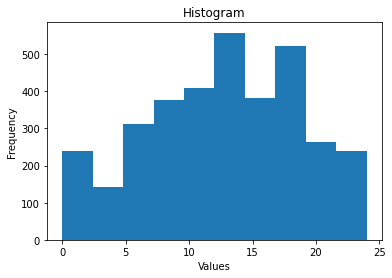

In [47]:
patches=plt.hist(new_int_ore)

plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

##### Si è scelto di non utilizzare la colonna Time in quanto poco significativa come distribuzione e poiché presenta un 30% circa di nan

# Analisi variabili fatalities, crew and passengers e ripartizione fatalities

In [48]:
dataset.keys()

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'AC Type',
       'Registration', 'cn/ln', 'Aboard', 'Aboard Passangers', 'Aboard Crew',
       'Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Ground',
       'Summary', 'New_Operator_column', 'Aeroporto_di_partenza',
       'Aeroporto_2', 'Aeroporto_3', 'Aeroporto_4', 'Aeroporto_5',
       'Aeroporto_6', 'Aeroporto_di_destinazione', 'AC_Type_simplified',
       'state_location', 'States', 'Year'],
      dtype='object')

In [49]:
dataset2=pd.DataFrame()
lista_var=["Fatalities","Fatalities Crew","Fatalities Passangers"]
for i in lista_var:
    dataset2.assign(i=[dataset[i]])
dataset2

""


In [50]:
data3=dataset
data3.keys()

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'AC Type',
       'Registration', 'cn/ln', 'Aboard', 'Aboard Passangers', 'Aboard Crew',
       'Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Ground',
       'Summary', 'New_Operator_column', 'Aeroporto_di_partenza',
       'Aeroporto_2', 'Aeroporto_3', 'Aeroporto_4', 'Aeroporto_5',
       'Aeroporto_6', 'Aeroporto_di_destinazione', 'AC_Type_simplified',
       'state_location', 'States', 'Year'],
      dtype='object')

In [51]:
print(np.max(data3.Fatalities),np.min(data3.Fatalities),np.mean(data3.Fatalities),np.median(data3.Fatalities),np.nanmedian(data3.Fatalities))

583.0 0.0 22.35591157980126 nan 11.0


In [52]:
new_fat=[]
new_crew=[]
for position,i in enumerate(data3["Fatalities"]):
    try:
        nenna=(data3["Fatalities Crew"].iloc[position] + data3["Fatalities Passangers"].iloc[position])
        nenna2=nenna+data3["Ground"].iloc[position]
        diff_nenna=i-nenna2
        if i == nenna2:
            new_fat.append(i)
            new_crew.append(data3["Fatalities Crew"].iloc[position])
        elif i > nenna2:
            #print(i,nenna2,data3["Ground"].iloc[position])
            #data3["Fatalities Crew"].iloc[position]=data3["Fatalities Crew"].iloc[position]+diff_nenna
            new_crew.append(data3["Fatalities Crew"].iloc[position]+diff_nenna)
            new_fat.append(i)
        elif i < nenna2:
            i = nenna2
            new_fat.append(i)
            new_crew.append(data3["Fatalities Crew"].iloc[position])
    except:
        new_fat.append(i)
        new_crew.append(data3["Fatalities Crew"].iloc[position])
print(len(new_fat),"new fat")#,new_fat)
print("\n")
print(len(new_crew),"new crew")#"aaaaaaaaaaaaaaaaaaaahhahahahahahahahahahahahahahahhahahahahahahahaha",new_crew)

4673 new fat


4673 new crew


In [53]:
coo=0
data3=data3[data3["Fatalities"].notna()]
for position, i in enumerate(data3.Fatalities):
    #if type(i) != float:
    if i == 0.0:
        print("fata","fata crew","fata pass")
        print(i,data3["Fatalities Crew"].iloc[position] ,data3["Fatalities Passangers"].iloc[position])
        coo = coo + 1

print(coo)

fata fata crew fata pass
0.0 0.0 0.0
fata fata crew fata pass
0.0 0.0 0.0
fata fata crew fata pass
0.0 2.0 0.0
fata fata crew fata pass
0.0 0.0 0.0
fata fata crew fata pass
0.0 0.0 0.0
fata fata crew fata pass
0.0 2.0 0.0
fata fata crew fata pass
0.0 0.0 0.0
fata fata crew fata pass
0.0 0.0 0.0
fata fata crew fata pass
0.0 0.0 0.0
fata fata crew fata pass
0.0 0.0 0.0
fata fata crew fata pass
0.0 0.0 0.0
fata fata crew fata pass
0.0 0.0 0.0
fata fata crew fata pass
0.0 0.0 0.0
fata fata crew fata pass
0.0 0.0 0.0
fata fata crew fata pass
0.0 0.0 0.0
fata fata crew fata pass
0.0 0.0 0.0
fata fata crew fata pass
0.0 nan nan
fata fata crew fata pass
0.0 1.0 1.0
fata fata crew fata pass
0.0 0.0 0.0
fata fata crew fata pass
0.0 0.0 0.0
fata fata crew fata pass
0.0 0.0 0.0
fata fata crew fata pass
0.0 0.0 0.0
fata fata crew fata pass
0.0 0.0 0.0
fata fata crew fata pass
0.0 0.0 0.0
fata fata crew fata pass
0.0 0.0 0.0
fata fata crew fata pass
0.0 0.0 0.0
fata fata crew fata pass
0.0 0.0 0.0
f

In [54]:
coo=0
data3=data3[data3["Fatalities"].notna()]
for position, i in enumerate(data3.Fatalities):
    coo=coo+1
    #if type(i) != float:
    nenna=(data3["Fatalities Crew"].iloc[position] + data3["Fatalities Passangers"].iloc[position])
    if i < nenna:
        print("mannaggia",i,nenna)
    #if i == 0.0:
     #   print("fata","fata crew","fata pass")
      #  print(i,data3["Fatalities Crew"].iloc[position] ,data3["Fatalities Passangers"].iloc[position])
        #coo = coo + 1

print(coo)

mannaggia 1.0 2.0
mannaggia 1.0 2.0
mannaggia 0.0 2.0
mannaggia 2.0 9.0
mannaggia 4.0 5.0
mannaggia 0.0 2.0
mannaggia 1.0 3.0
mannaggia 1.0 6.0
mannaggia 18.0 21.0
mannaggia 13.0 15.0
mannaggia 41.0 42.0
mannaggia 0.0 2.0
mannaggia 21.0 24.0
mannaggia 20.0 27.0
mannaggia 11.0 13.0
mannaggia 9.0 11.0
mannaggia 61.0 63.0
mannaggia 13.0 16.0
mannaggia 24.0 216.0
mannaggia 3.0 4.0
mannaggia 4.0 9.0
mannaggia 60.0 80.0
mannaggia 15.0 104.0
mannaggia 33.0 43.0
mannaggia 12.0 14.0
mannaggia 3.0 5.0
mannaggia 0.0 4.0
4931


In [55]:
dataset=dataset.assign(new_fat=new_fat,new_crew=new_crew)

ValueError: Length of values (4673) does not match length of index (4939)